In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
p_data_nocharge = sp.sparse.load_npz('../data/NO-tilt/wrong-detector-length/20x20x20/pDisc_40000_nocharge.npz')
C_data_nocharge = sp.sparse.load_npz('../data/NO-tilt/wrong-detector-length/20x20x20/CDisc_40000_nocharge.npz')


p_data_charge = sp.sparse.load_npz('../data/NO-tilt/wrong-detector-length/20x20x20/pDisc_40000_charge.npz')
C_data_charge = sp.sparse.load_npz('../data/NO-tilt/wrong-detector-length/20x20x20/CDisc_40000_charge.npz')

#same labels will work
p_labels = np.zeros((p_data_nocharge.shape[0],))
C_labels = np.ones((C_data_nocharge.shape[0],))

In [4]:
full_data_nocharge = sp.sparse.vstack([p_data_nocharge, C_data_nocharge], format='csr')
full_data_c = sp.sparse.vstack([p_data_charge, C_data_charge], format='csr')

full_labels = np.hstack((p_labels, C_labels))
print(full_data_nocharge.shape)
print(full_data_c.shape)

print(full_labels.shape)

(80002, 8000)
(80002, 8000)
(80002,)


In [5]:
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(full_data_nocharge, full_labels, test_size=0.25, random_state=42)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(full_data_c, full_labels, test_size=0.25, random_state=42)

In [6]:
reg = 1
iterations = 1000
nc = LogisticRegression(C=reg, max_iter=iterations)
y_pred_c = nc.fit(X_train_c, y_train_c).predict(X_test_c)

In [7]:
print("With regularization C=" + str(reg) + " precision: " + str(metrics.precision_score(y_test_c, y_pred_c)))
print("With regularization C=" + str(reg) + " accuracy: " + str(metrics.accuracy_score(y_test_c, y_pred_c)))
print(metrics.classification_report(y_test_c, y_pred_c))

With regularization C=1 precision: 0.9692702980472765
With regularization C=1 accuracy: 0.9569021548922554
             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96     10007
        1.0       0.97      0.94      0.96      9994

avg / total       0.96      0.96      0.96     20001



In [8]:
C_vals = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
print(C_vals)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]


In [9]:
precisions_nc = []
recalls_nc = []
f1s_nc = []
accuracies_nc = []

precisions_c = []
recalls_c = []
f1s_c = []
accuracies_c = []

for c in C_vals:
    y_pred_nc = LogisticRegression(C=c, max_iter=iterations).fit(X_train_nc, y_train_nc).predict(X_test_nc)
    
    precisions_nc.append(metrics.precision_score(y_test_nc, y_pred_nc))
    recalls_nc.append(metrics.recall_score(y_test_nc, y_pred_nc))
    f1s_nc.append(metrics.f1_score(y_test_nc, y_pred_nc))
    accuracies_nc.append(metrics.accuracy_score(y_test_nc, y_pred_nc))
    print("No Charge and C=" + str(c) + " f1=" + str(metrics.f1_score(y_test_nc, y_pred_nc)))
    
    y_pred_c = LogisticRegression(C=c, max_iter=iterations).fit(X_train_c, y_train_c).predict(X_test_c)
    
    precisions_c.append(metrics.precision_score(y_test_c, y_pred_c))
    recalls_c.append(metrics.recall_score(y_test_c, y_pred_c))
    f1s_c.append(metrics.f1_score(y_test_c, y_pred_c))
    accuracies_c.append(metrics.accuracy_score(y_test_c, y_pred_c))
    print("Charge and C=" + str(c) + " f1=" + str(metrics.f1_score(y_test_c, y_pred_c)))

No Charge and C=1e-05 f1=0.03483845854418061
Charge and C=1e-05 f1=0.6942504776793469
No Charge and C=0.0001 f1=0.4908051689860835
Charge and C=0.0001 f1=0.9354838709677419
No Charge and C=0.001 f1=0.6764998814322978
Charge and C=0.001 f1=0.9536183713551897
No Charge and C=0.01 f1=0.7046539938196461
Charge and C=0.01 f1=0.9564777327935222
No Charge and C=0.1 f1=0.7015622023242523
Charge and C=0.1 f1=0.9573680742130076
No Charge and C=1.0 f1=0.6930379746835443
Charge and C=1.0 f1=0.9562968971810992
No Charge and C=10.0 f1=0.6897910160941629
Charge and C=10.0 f1=0.9557943830477542
No Charge and C=100.0 f1=0.6883984806961874
Charge and C=100.0 f1=0.9556795131845841
No Charge and C=1000.0 f1=0.6883716456670192
Charge and C=1000.0 f1=0.9555296384564677
No Charge and C=10000.0 f1=0.6884347198845876
Charge and C=10000.0 f1=0.9555780933062881


In [10]:
print(max(accuracies_nc))
print(max(accuracies_c))
#print(max(f1s_nc))
#print(max(f1s_c))

0.6867156642167892
0.9579521023948803


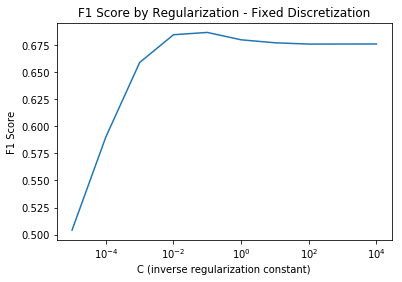

In [11]:
plt.plot(C_vals, accuracies_nc)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('F1 Score')
plt.title('F1 Score by Regularization - Fixed Discretization')

#plt.savefig('/home/taylor/Documents/independent-research/plots/results/LogisticRegression_F1xC_CorrectDisc.pdf')

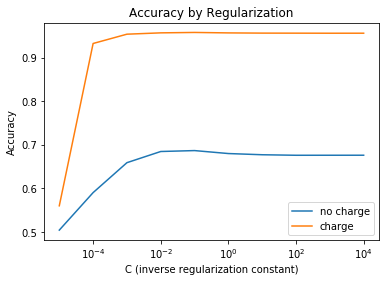

In [12]:
a = np.arange(len(C_vals))

plt.plot(C_vals, accuracies_nc)
plt.plot(C_vals, accuracies_c)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('Accuracy')
plt.title('Accuracy by Regularization')
plt.legend(['no charge', 'charge'], loc='lower right')

#plt.savefig('../plots/results/thesis/LogisticRegression_CxAcc.pdf')

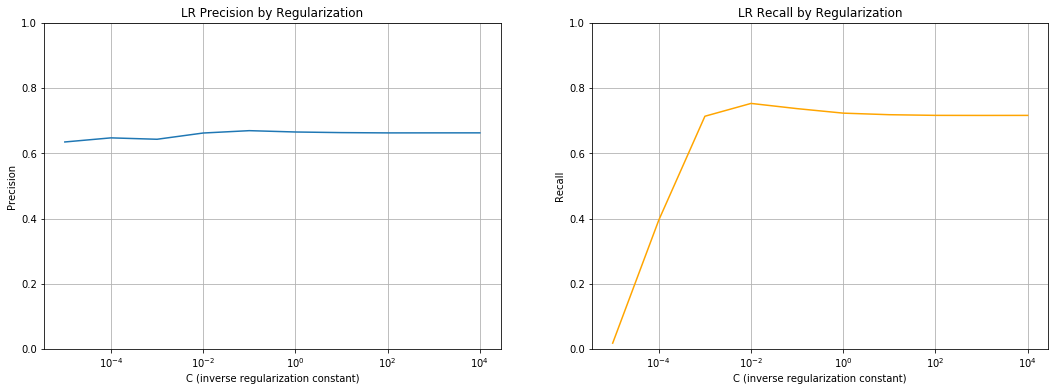

In [13]:
fig, ax = plt.subplots(1, 2, squeeze=True, figsize=(18, 6))

ax[0].plot(C_vals, precisions_nc)
ax[0].semilogx()     
ax[0].set_ylim(0,1)
ax[0].set_xlabel('C (inverse regularization constant)')
ax[0].set_ylabel('Precision')
ax[0].set_title('LR Precision by Regularization')
ax[0].grid()

#######################################################################################################################
ax[1].plot(C_vals, recalls_nc, c='orange')
ax[1].semilogx()
ax[1].set_ylim(0,1)
ax[1].set_xlabel('C (inverse regularization constant)')
ax[1].set_ylabel('Recall')
ax[1].set_title('LR Recall by Regularization')
ax[1].grid()

#fig.savefig('/home/taylor/Documents/independent-research/plots/results/LogisticRegression_C_PR.pdf')

In [ ]:
# param_grid = {'C': [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]}
# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()
#     clf = GridSearchCV(LogisticRegression(), param_grid)
#     clf.fit(X_train_nc, y_train_nc)
    
#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test_nc, clf.predict(X_test_nc)
#     print(classification_report(y_true, y_pred))
#     print('')

# Data with random noise

In [14]:
p_data_NOISE = sp.sparse.load_npz('../data/NO-tilt/wrong-detector-length/20x20x20/pDisc_40000_charge_NOISE.npz')
C_data_NOISE = sp.sparse.load_npz('../data/NO-tilt/wrong-detector-length/20x20x20/CDisc_40000_charge_NOISE.npz')

p_labels_NOISE = np.zeros((p_data_nocharge.shape[0],))
C_labels_NOISE = np.ones((C_data_nocharge.shape[0],))

In [15]:
full_data_NOISE = sp.sparse.vstack([p_data_NOISE, C_data_NOISE], format='csr')

full_labels_NOISE = np.hstack((p_labels_NOISE, C_labels_NOISE))

print(full_data_NOISE.shape)
print(full_labels_NOISE.shape)

(80002, 8000)
(80002,)


In [16]:
X_train_NOISE, X_test_NOISE, y_train_NOISE, y_test_NOISE = train_test_split(full_data_NOISE, full_labels_NOISE, test_size=0.25, random_state=42)

In [17]:
C_vals = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]

f1s_NOISE = []
accuracies_NOISE = []

for c in C_vals:
    y_pred_NOISE = LogisticRegression(C=c, max_iter=iterations).fit(X_train_NOISE, y_train_NOISE).predict(X_test_NOISE)
    f1s_NOISE.append(metrics.f1_score(y_test_NOISE, y_pred_NOISE))
    accuracies_NOISE.append(metrics.accuracy_score(y_test_NOISE, y_pred_NOISE))

In [18]:
print(max(accuracies_NOISE))

0.9146542672866357


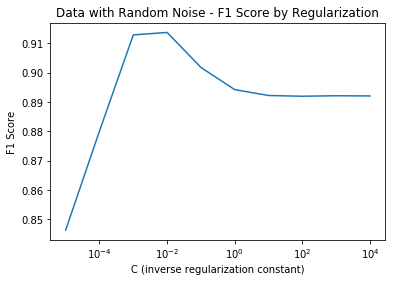

In [19]:
a = np.arange(len(C_vals))

plt.plot(C_vals, f1s_NOISE)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('F1 Score')
plt.title('Data with Random Noise - F1 Score by Regularization')

#plt.savefig('/home/taylor/Documents/independent-research/plots/results/LogisticRegression_F1xC_NOISE.pdf')

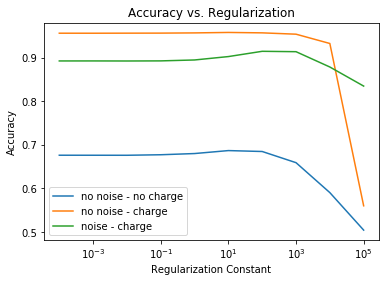

In [34]:
a = np.arange(len(C_vals))

reg_vals = np.reciprocal(C_vals)

plt.plot(reg_vals, accuracies_nc)
plt.plot(reg_vals, accuracies_c)
plt.plot(reg_vals, accuracies_NOISE)

plt.xscale('log')
        
plt.xlabel('Regularization Constant')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization')
plt.legend(['no noise - no charge', 'no noise - charge', 'noise - charge'], loc='lower left')

#plt.savefig('../plots/results/thesis/LR-sim2sim-pC-RegxAcc.pdf')